# Exercici 1
## Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.
## ->[03 EXAMINING DATA](https://github.com/BIDDL3/Examining-Data/blob/main/03%20EXAMINING%20DATA.ipynb) 

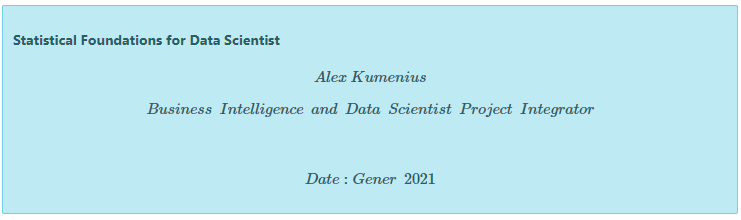

### RELACIONES ENTRE VARIABLES

Para responder a las preguntas de la investigación, hay que recopilar datos.

Los análisis están motivados por la **búsqueda** de una **relación entre dos o más variables**.

El examen del **resumen estadístico** podría aportar información sobre cada una de las preguntas de investigación del estudio.

Un **resumen estadístico** es un **número único que resume una gran cantidad de datos**. En otras palabras, un **resumen estadístico** es un **valor** calculado a partir de los **datos**.

### EXAMINAR DATOS NUMÉRICOS

Nos introduciremos en las técnicas de **exploración** y **resumen de variables numéricas**, trabajando con dos conjuntos de datos: "email50", "county" y "cars".

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                     # libreria de warnings

warnings.filterwarnings('ignore')   # solicita ingorar los wranings que de la libreria (normalemnte no es recomendable no verlos)

### EXPLORACIÓN DE VARIABLES BIVARIANTES CON GRÁFICOS DE DISPERSIÓN (Scatterplots)
Un **gráfico de dispersión (Scatterplot)** proporciona una visión caso por caso de los datos de **dos variables numéricas (bivariantes)**.

**Los gráficos de dispersión (Scatterplots)** son útiles para **detectar rápidamente asociaciones entre variables**, tanto si esas asociaciones se presentan en forma de **simples tendencias** como si esas relaciones son más **complejas**.

Utilizaremos un **gráfico de dispersión** para examinar cómo el gasto federal (federal spending) y la pobreza (poverty)estan relacionados en el conjunto de los datos.

In [2]:
county = pd.read_csv('https://raw.githubusercontent.com/BIDDL3/Examining-Data/main/county.txt', sep='\t', encoding='utf-8')

In [3]:
county.shape        # Nos da el tamaño del dataframe en filas y columnas

(3143, 10)

In [4]:
county.columns        # Nos da los títulos de columnas del Dataframe

Index(['name', 'state', 'pop2000', 'pop2010', 'fed_spend', 'poverty',
       'homeownership', 'multiunit', 'income', 'med_income'],
      dtype='object')

In [5]:
county.state.unique()     # Permite ver los valores de la columna unicos aunque se repitan

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [6]:
county.state.nunique()   # Cuenta los valores unicos de la columna

51

In [7]:
county.describe().round(3)     # Obtenemos un resumen estadístico del dataframe redondeando los valores a 3 decimales

,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
count,3140.000,3143.000,3139.000,3143.000,3143.000,3143.000,3143.000,3143.000
mean,89623.445,98232.752,9.991,15.499,73.264,12.325,22504.696,44270.299
std,292504.848,312901.202,7.567,6.384,7.832,9.291,5408.668,11547.636
min,67.000,82.000,0.000,0.000,0.000,0.000,7772.000,19351.000
25%,11209.750,11104.500,6.964,11.000,69.500,6.100,19030.000,36952.000
50%,24608.000,25857.000,8.669,14.700,74.600,9.700,21773.000,42445.000
75%,61766.500,66699.000,10.857,19.000,78.400,15.900,24813.500,49142.000
max,9519338.000,9818605.000,204.616,53.500,91.300,98.500,64381.000,115574.000


In [8]:
county.pop2000.mean()  # Calcula la media aritmética de los valores de la columna pop2000 (el valor promedio de la población en el año 2000)

89623.44490445859

**¡Atención!**: El grafico que nos proponen tiene errores:

* Los nombres de los ejes estan cruzados si miramos d donde salen su datos, pues:
    * Si definimos x = county.fed_spend; entonces plt.xlabel("Ratio de pobreza (Porcentaje)") no es correcto, debería ser plt.ylabel("Gasto Federal per capita")
    * Si definimos y = county.poverty; entonces plt.ylabel("Gasto Federal per capita") no es correcto, debería ser plt.ylabel(Ratio de pobreza (Porcentaje)")
    
Adicionalmente debemos saber que:
* El recorte de ejes que define plt.axis([-10, 100, 0, 60]), es solo eso, un recorte de ejes en el que los puntos alejados no aparecen, si la quitáramos veríamos los puntos de fed_spend que llegan hasta 204 k$.
* Asumimos que la columna poverty es un valor porcentual per se, sino, la gráfica no estaría dando valores porcentuales sino absolutos para este eje.


Veamos el grafico que proponen:

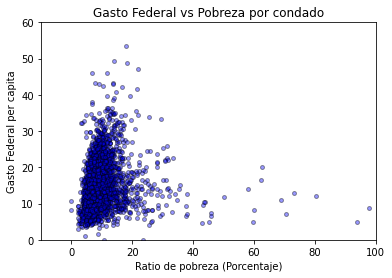

In [9]:
# Crea los datos
x = county.fed_spend   #No define valores % sino absolutos
y = county.poverty
colors = 'Blue'     # Define el color de los puntos del gráfico de dispersión
area = np.pi*5      # El área de cada punto en el gráfico de dispersión, calculada como el producto de pi (π) por 5

plt.axis([-10, 100, 0, 60])  # Define los limites de la ventana, de los ejes x (-10, 100) e y(0,60)

# Genera el Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')  # Define el grafico de dispersion entre x e y, con s(la dimensión del area de los puntos), c(color de los puntos), alpha (nivel de transparencia de los puntos), edgecolors (define como negro el borde de los puntos)

# Define el titulo del grafico, y las etiquetas de los ejes donde el eje x está definido errónemaente como porcentaje.
plt.title("Gasto Federal vs Pobreza por condado")
plt.ylabel("Gasto Federal per capita")
plt.xlabel("Ratio de pobreza (Porcentaje)")
plt.show()

Asumiendo que la columna fed_spend define valores porcentuales, graficamos con los titulos de los ejes correctamente, cortando el gasto federal en los valores de 100.000 dolares, no confundir con que el eje x grafique el % de este dato):

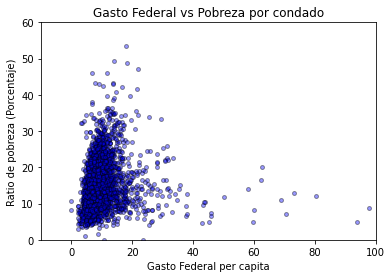

In [10]:
x = county.fed_spend
y = county.poverty
colors = 'Blue'    
area = np.pi*5 

plt.axis([-10, 100, 0, 60])

plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black') 

plt.title("Gasto Federal vs Pobreza por condado")
plt.ylabel("Ratio de pobreza (Porcentaje)")
plt.xlabel("Gasto Federal per capita")
plt.show()

Si la columna poverty no da valores porcentuales y queremos graficaren la aportación de ese valor en % del total de valores de poverty:

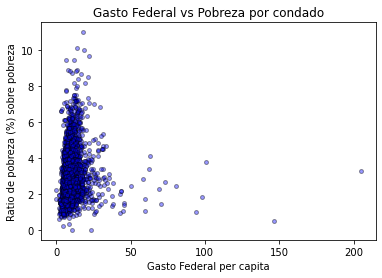

In [11]:
x = county.fed_spend
y = 10000*county.poverty/county.poverty.sum()
colors = 'Blue'    
area = np.pi*5 

plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black') 

plt.title("Gasto Federal vs Pobreza por condado")
plt.ylabel("Ratio de pobreza (%) sobre pobreza")
plt.xlabel("Gasto Federal per capita")
plt.show()

Hecho este inciso, continuamos con el ejercicio:

En cualquier **gráfico de dispersión**, cada punto representa un único **caso/observación**. Como hay **3.143** casos en *county* hay **3.143** puntos.

Ahora compararemos **el número de saltos de línea (line_breaks)** y **el número de caracteres (num_car)** de los correos electrónicos del conjunto de datos *email50*.

In [12]:
dbe = pd.read_csv('https://raw.githubusercontent.com/BIDDL3/Examining-Data/main/email50.txt',
                encoding='utf-8', sep='\t')

In [13]:
dbe.shape

(50, 21)

In [14]:
dbe.head()

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,1,2012-01-04 05:19:16,0,0,0,no,...,0,0,21.705,551,1,1,0,0,8,small
1,0,0,1,0,0,2012-02-16 12:10:06,0,0,0,no,...,0,0,7.011,183,1,0,0,0,1,big
2,1,0,1,4,0,2012-01-04 07:36:23,0,2,0,no,...,0,0,0.631,28,0,0,0,0,2,none
3,0,0,1,0,0,2012-01-04 09:49:52,0,0,0,no,...,0,0,2.454,61,0,0,0,0,1,small
4,0,0,1,0,0,2012-01-27 01:34:45,0,0,9,no,...,0,1,41.623,1088,1,0,0,0,43,small


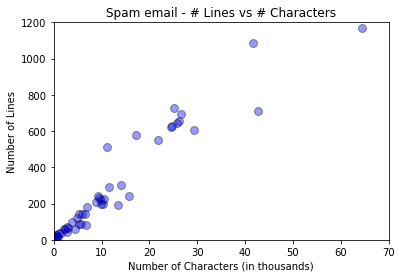

In [15]:
# Create data
x = dbe.num_char
y = dbe.line_breaks

colors = "Blue"
area = np.pi*20
plt.axis([0, 70, 0, 1200])

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')
plt.title('Spam email - # Lines vs # Characters')
plt.ylabel('Number of Lines')
plt.xlabel('Number of Characters (in thousands)')
plt.show()

Para poner el **número de caracteres** en perspectiva, este párrafo tiene **363** caracteres. Si observamos el **diagrama de dispersión**, parece que algunos correos electrónicos son increíblemente prolijos(muchas palabras)!. Si investigamos un poco más, nos daremos cuenta de que la mayoría de los correos electrónicos largos utilizan el **formato HTML**, lo que significa que la mayoría de los caracteres de esos correos se utilizan para **dar formato al correo electrónico** en lugar de proporcionar texto.

In [16]:
dbcars = pd.read_csv('https://raw.githubusercontent.com/BIDDL3/Examining-Data/main/cars.txt',
                encoding='utf-8', sep='\t')

Consideremos un nuevo conjunto de datos *cars* (coches) de 54 *cars* (cpcjes) con 6 variables. Cree un gráfico de dispersión para examinar cómo *vehicle price* (precio de vehículo) y *weight* (peso) están relacionadas.

¿Qué puede decirse de la relación entre estas variables?

In [17]:
dbcars.shape

(54, 6)

In [18]:
dbcars.head()

,type,price,mpgCity,driveTrain,passengers,weight
0,small,15.9,25,front,5,2705
1,midsize,33.9,18,front,5,3560
2,midsize,37.7,19,front,6,3405
3,midsize,30.0,22,rear,4,3640
4,midsize,15.7,22,front,6,2880


In [19]:
# Verificación tipo de datos de las variables
dbcars.dtypes

type           object
price         float64
mpgCity         int64
driveTrain     object
passengers      int64
weight          int64
dtype: object

In [20]:
dbcars.describe()

,price,mpgCity,passengers,weight
count,54.000000,54.000000,54.000000,54.000000
mean,19.992593,23.314815,5.111111,3037.407407
std,11.506452,6.624210,0.691366,657.664350
min,7.400000,16.000000,4.000000,1695.000000
25%,10.950000,19.000000,5.000000,2452.500000
50%,17.250000,21.000000,5.000000,3197.500000
75%,26.250000,28.000000,6.000000,3522.500000
max,61.900000,46.000000,6.000000,4105.000000


In [21]:
# Variables Categóricas
dbcars.type.unique()    # Indetificación de los datos únicos de la variable categórica type

array(['small', 'midsize', 'large'], dtype=object)

In [22]:
# Categorical Variables
dbcars.driveTrain.unique()    # Indem para driveTrain

array(['front', 'rear', '4WD'], dtype=object)

Text(0.5, 0, 'Weight (Pounds)')

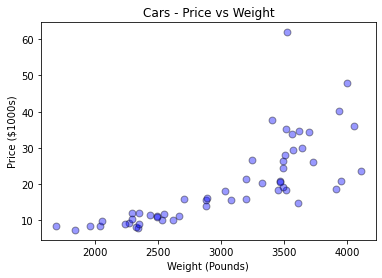

In [23]:
# Create data
x = dbcars.weight
y = dbcars.price

colors = "Blue"
area = np.pi*15

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')
plt.title('Cars - Price vs Weight')
plt.ylabel('Price ($1000s)')
plt.xlabel('Weight (Pounds)')

La relación es **evidentemente no lineal**.

**NOTA:** Corrijo directamente los ejes de la primera gráfica, pues como ya he comentado, estan cruzados. A cotinuación simplemente grafica las tres juntas:

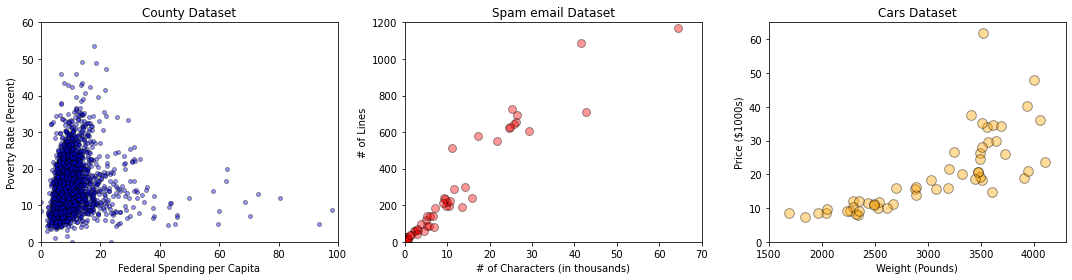

In [24]:
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(1, 3, 1)   # (1 fila, 3 columnas, figura 1)

# Create data
x = county.fed_spend
y = county.poverty
colors = 'Blue'
area = np.pi*5

plt.axis([0, 100, 0, 60])

# Plot
ax1.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('County Dataset')
plt.ylabel('Poverty Rate (Percent)')
plt.xlabel('Federal Spending per Capita')

ax2 = fig.add_subplot(1, 3, 2)
# Create data
x = dbe.num_char
y = dbe.line_breaks

colors = "Red"
area = np.pi*20
plt.axis([0, 70, 0, 1200])

# Plot
ax2.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')
plt.title('Spam email Dataset')
plt.ylabel('# of Lines')
plt.xlabel('# of Characters (in thousands)')

ax3 = fig.add_subplot(1, 3, 3)
# Create data
x = dbcars.weight
y = dbcars.price

colors = "Orange"
area = np.pi*30
plt.axis([1500, 4300, 0, 65])

# Plot
ax3.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')
plt.title('Cars Dataset')
plt.ylabel('Price ($1000s)')
plt.xlabel('Weight (Pounds)')

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout()

### MATRIX PLOTS

La función pairplot() de la librería Seaborn está diseñada para visualizar la relación entre múltiples variables en un conjunto de datos. Por lo general, se utiliza para explorar relaciones entre variables numéricas, ya que se basa en gráficos de dispersión (scatter plots) para mostrar la relación entre pares de variables, aunque también permite trabajar con variables categóricas.

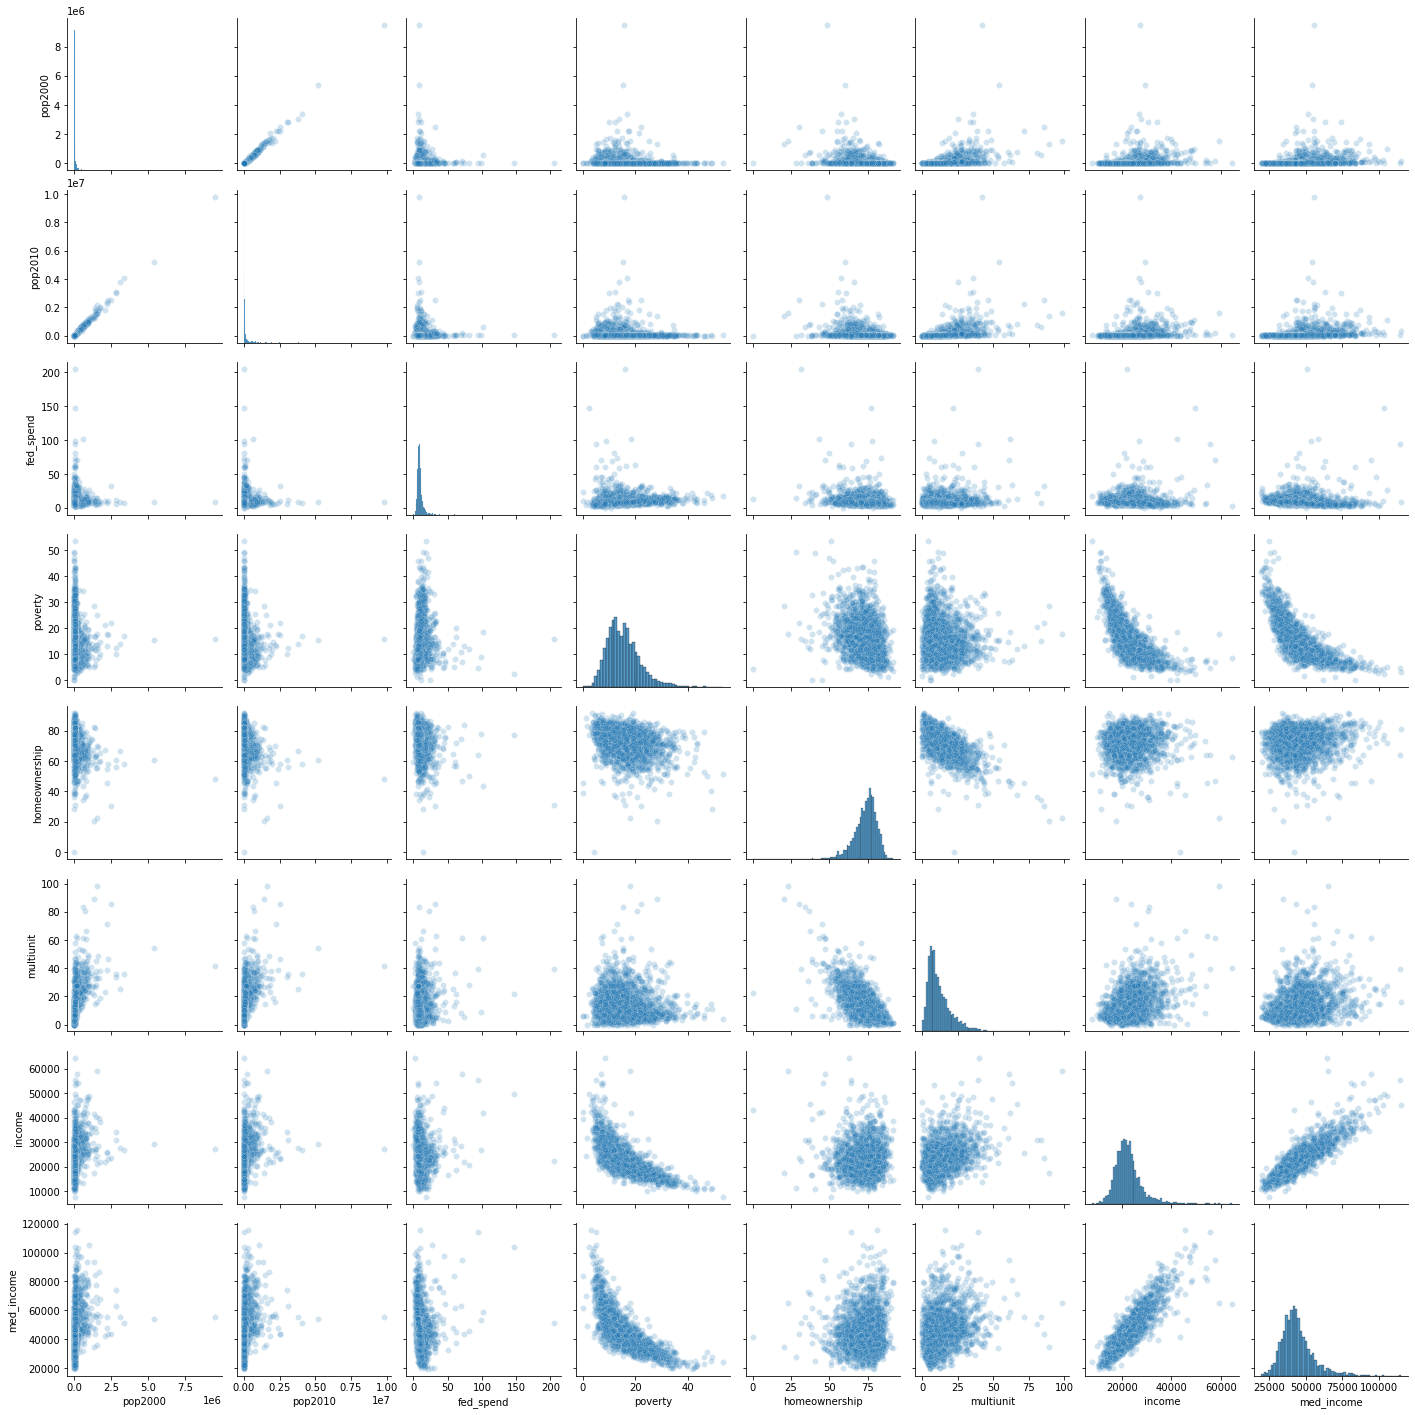

In [25]:
# Matrix Plot
sns.pairplot(county, diag_kind='hist', plot_kws={'alpha': 0.2})

### HISTOGRAMAS

Los gráficos de puntos (Dot Plots), como los de dispersión (Scatterplot), muestran el **valor exacto de cada observación**. Esto es útil para **pequeños conjuntos de datos**, pero pueden resultar difíciles de leer con **muestras más grandes**.

En lugar de mostrar el *valor de cada observación*, preferimos pensar que el valor pertenece a un **intervalo (bin)**.

Estos **intervalos -(counts)** se representan como **barras** en lo que se denomina **Histograma**.

El **histograma** proporciona una visión de la **densidad de los datos**. Las barras más altas representan dónde los datos son relativamente más comunes.

Los **histogramas** son especialmente útiles para describir la *forma de la distribución de los datos*.

* Cuando los datos **se desvían** hacia la derecha y tienen una cola derecha más larga, se dice que la forma es *sesgada hacia la derecha (Right Skewed)* o también llamada *sesgada hacia el extremo positivo (Skewed to the Positive End)**.

* Por el contrario, los datos que presentan la característica **inversa**, es decir -*una fina cola larga hacia la izquierda*- se consideran **sesgados a la izquierda (Left Skewed)**. También decimos que una distribución de este tipo tiene una **larga cola izquierda (long left tail)**.

* Los datos que muestran una cola aproximadamente **igual** en ambas direcciones se denominan **Simétricos (Symmetric)**.

In [26]:
dbe.describe()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess
count,50.000000,50.00000,50.0,50.000000,50.000000,50.0,50.000000,50.000000,50.0,50.0,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.0,50.000000
mean,0.100000,0.14000,1.0,0.380000,0.320000,0.0,0.100000,0.900000,0.0,0.0,0.460000,11.598220,267.30000,0.740000,0.280000,0.060000,0.0,4.420000
std,0.303046,0.35051,0.0,1.085902,0.471212,0.0,0.416497,3.518174,0.0,0.0,1.631451,13.125261,290.81983,0.443087,0.453557,0.239898,0.0,7.661433
min,0.000000,0.00000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.057000,5.00000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.00000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.535500,60.25000,0.250000,0.000000,0.000000,0.0,1.000000
50%,0.000000,0.00000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,6.889500,162.50000,1.000000,0.000000,0.000000,0.0,1.500000
75%,0.000000,0.00000,1.0,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,15.410750,459.00000,1.000000,1.000000,0.000000,0.0,4.000000
max,1.000000,1.00000,1.0,5.000000,1.000000,0.0,2.000000,23.000000,0.0,0.0,8.000000,64.401000,1167.00000,1.000000,1.000000,1.000000,0.0,43.000000


Text(0.5, 0, '# Characters (in thousands)')

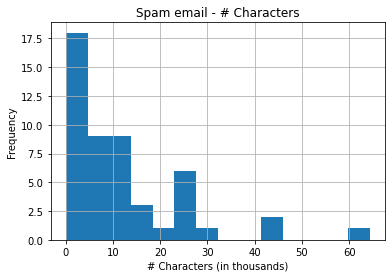

In [27]:
dbe.hist(['num_char'], bins=14)   # Histograma de la distribución de numero de caracteres
plt.title('Spam email - # Characters')
plt.ylabel('Frequency')
plt.xlabel('# Characters (in thousands)')

#### Colas largas para identificar la asimetría (skew)
Cuando los datos se desvían en una dirección, la distribución tiene una **cola larga**. Si una distribución tiene una larga cola izquierda, está **sesgada a la izquierda (Left Skewed)**. Si una distribución tiene una larga cola derecha, está **sesgada a la derecha (Right Skewed)**.


### DISTRIBUCIÓN MODAL

Además de observar si una distribución es **Asimétrica (Skewed) o Simétrica (Symmetric)**, los histogramas pueden utilizarse para identificar **Modas (Modes)**.

Una **moda** es el **valor con el mayor número de ocurrencias**.

Sin embargo, es común que **no haya observaciones** con el mismo valor en un conjunto de datos, lo que hace que **la moda** sea inútil para muchos conjuntos de datos reales.

Una **moda** está representada por un pico prominente en la **distribución**. Sólo hay un pico prominente en el histograma de **num_char**.

Los histogramas que tienen uno, dos o tres picos prominentes se denominan **Unimodales,
 Bimodales y Multimodales**, respectivamente.

Cualquier **distribución** con más de 2 picos prominentes se llama **Multimodal**.

Observe que había **un pico prominente** en la distribución **Unimodal** con un **segundo pico menos prominente** que **no se contó**, ya que sólo difiere de sus **intervalos vecinos (bins)** en unas pocas **observaciones**.

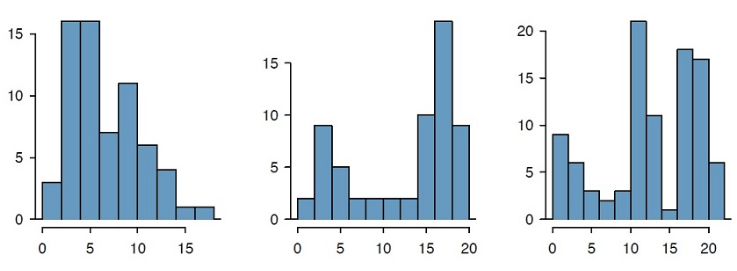

#### Búsqueda de modas
Buscar las **modas** no consiste en encontrar una respuesta clara y correcta sobre el número de **modas** de una **distribución**.

Lo importante del análisis es comprender mejor los datos y cómo podrían estar estructurados.

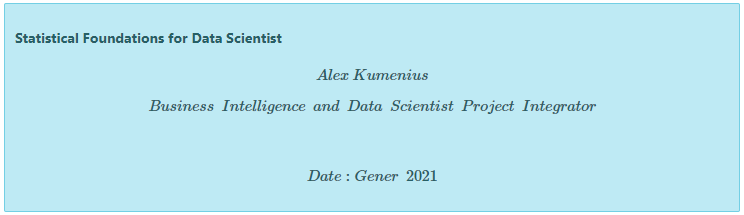

## RESUMEN ESTADÍSTICO

### Media (Mean) - Promedio (Average)

La **media (mean)**, a veces llamada **promedio (Average)**, es una forma común de medir el **centro de una distribución de datos**.

Para hallar la **media numérica** de caracteres **(num_char)** en los 50 correos electrónicos, **sumamos** todos los recuentos de caracteres y los **dividimos** por el número de correos electrónicos.

Por **conveniencia computacional**, el número de caracteres se enumera en **miles** y se **redondean** al primer decimal.

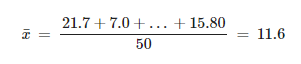

dbe.num_char.mean().round(3)  # Aunqeu pone esto, esta mal. Esta sentencia esta mal, porque round() no es aplicable asi 

In [28]:
round(dbe.num_char.mean(),3)  #así si es correcto.

11.598

La **media muestral** suele denominarse $\bar{x}$ se calcula como la **suma** de todas las observaciones **dividida** por el número de observaciones:
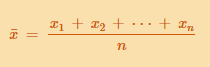
donde x1, x2, .....xn representan n valores observados.

Es habitual pensar en la **media** como el punto de equilibrio the una **distribución**.

### EJERCICIO - 3.1

Compara las dos ecuaciones anteriores.

* ¿A qué corresponde x1?
* y x2?
* ¿Puedes deducir un significado general de lo que xi  podría representar?
* ¿Qué era n en esta muestra de correos electrónicos?

### SOLUCIÓN - 3.1

* x1corresponde al número de caracteres del primer correo electrónico de la muestra (21,7, en miles),
* x2 al número de caracteres del segundo correo electrónico (7,0, en miles), y
* xi corresponde al número de caracteres del i-ésimo mail del conjunto de datos. 
* El tamaño de la muestra era n = 50.

### Media poblacional (population mean)
La **media de la población** tiene un simbolo especial: $\mu$.
El simbolo $\mu$ es la letra griega *mu* y representa el promedio/media de las observaciones de la **Población**.

A veces se utiliza un subíndice (como x) para representar a qué variable se refiere la media de la población, por ejemplo $\mu_{x}$

### EJERCICIO - 3.2

El promedio de caracteres de todos los correos electrónicos (**población**) puede estimarse utilizando los **datos de la muestra**.

A partir de la **muestra** de 50 *emails*, ¿cuál sería una estimación razonable de $\mu_{x}$ la **media** de caracteres en todos los correos electrónicos del conjunto de datos? (Recordemos que *email50* es una muestra de *email*.)

### SOLUCIÓN - 3.2

La **media muestral**, 11,6, puede proporcionar una estimación razonable de $\mu_{x}$ 
.
Aunque este número no será perfecto, proporciona una **estimación puntual** de la media poblacional.

### Varianza y Desviación Estandard/Típica

In [29]:
dbe.num_char.mean()- dbe.num_char.std()

-1.5270410334236892

#### Varianza

La **media** se introdujo como método para describir el centro de un conjunto de datos, pero la **variabilidad de los datos** también es importante.

Introducimos **dos medidas de variabilidad**: la **Varianza** y la **Desviación Estándar**. Ambas son muy útiles en el análisis de datos.

La **Desviación Estándar** describe **cuán lejos** se encuentra la observación típica de la media.

Llamamos **Desviación** a la distancia de una observación respecto a su media.

A continuación se muestran las **desviaciones** de las observaciones 1ª, 2ª, 3ª y 50ª en la variable **num_char**. Por comodidad de cálculo, el número de caracteres se indica en miles y se redondea al primer decimal.

In [30]:
dbe.num_char.iloc[[1], ] #Devuelve el valor de la segunda fila de la columna num_char

1    7.011
Name: num_char, dtype: float64

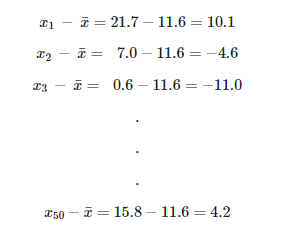

Si elevamos al cuadrado estas **desviaciones** y luego sacamos una media, el resultado es aproximadamente igual a la **varianza muestral**, denotada por $s^{2}$:

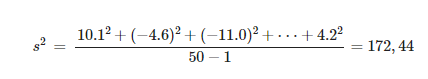

#### Varianza de la muestra 
Dividimos por *n-1* en lugar de dividir por *n*, cuando calculamos la **Varianza**.

**Elevar al cuadrado las desviaciones** hace dos cosas:

* En primer lugar, **hace que los valores grandes sean mucho más grandes**, como se ve al comparar $10.1^{2}$, $(-4.6)^{2}$, $(-11.0)^{2}$ y $4.2^{2}$.
* En segundo lugar, **elimina los signos negativos**.

La **varianza** es aproximadamente **la distancia media al cuadrado** de la **media**.

### Desviación Estandar/Típica

#### Desviación típica
La Desviación Estándar se define como la raíz cuadrada de la **Varianza**:
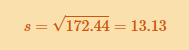
La **Desviación Estándar** es útil cuando se quier saber lo cerca que están los datos de la **Media**.

Las fórmulas y métodos utilizados para calcular la **Varianza** y la **Desviación Estándar** para una **Población** son similares a los utilizados para una **muestra** (La única diferencia es que la **Varianza de la Población** tiene una división por *n* en lugar de por *n-1*).

Sin embargo, al igual que la **Media**, los valores de la **Población** tienen símbolos especiales:

* $\sigma ^{2}$ para la **Varianza** y
* $\sigma$ para la **Desviación Estándar**.
El símbolo $\sigma$ es la letra *griega* de *sigma*.

In [31]:
round(dbe.num_char.std(),3) # Lo escribo bien esta vez directamente

13.125

La **Desviación Estándar** describe la **Variabilidad**, por lo que hay que centrarse en el significado conceptual de la **Desviación Estándar** como descriptor de la Variabilidad, más que en las fórmulas.

Normalmente, el 70% de los datos estarán dentro de **una desviación típica de la media** y alrededor del 95% estarán dentro de **dos desviaciones típicas**. Sin embargo, estos porcentajes no son reglas estrictas.

### EXERCISE - 3.6

Una buena **descripción de la forma de una distribución** debe incluir la **modalidad** y si la **distribución** es **simétrica o está sesgada** hacia un lado.

Explore la figura como ejemplo y explique por qué es importante una descripción de este tipo:

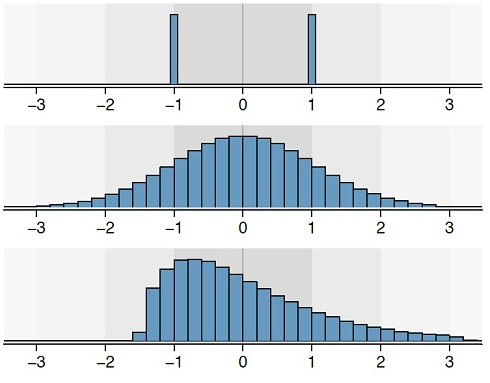

### SOLUCIÓN - 3.6

La figura muestra tres distribuciones que parecen bastante diferentes, pero todas tienen la misma **Media, Varianza y Desviación típica**.

Verificando la **Modalidad**, podemos distinguir entre el primer gráfico (**bimodal**) y los dos últimos (**unimodales**).

Verificando la **asimetría**, podemos distinguir entre el último gráfico (**sesgado a la derecha**) y los dos primeros.

Mientras que una imagen, como un **histograma**, cuenta una historia más **completa**, podemos utilizar la **Modalidad** y la forma (**Simetría/Sesgo**) para caracterizar la información básica sobre una **distribución**.

Text(0.5, 0, '# Characters (in thousands)')

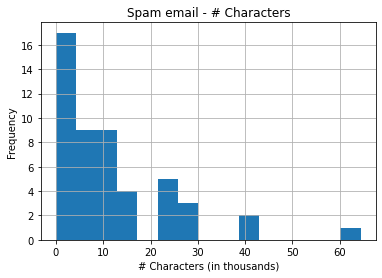

In [32]:
dbe.hist(['num_char'], bins=15)
plt.title('Spam email - # Characters')
plt.ylabel('Frequency')
plt.xlabel('# Characters (in thousands)')

### EJERCICIO - 3.7

Describa la **distribución** de la variable **num_char** utilizando la visualización del histograma anterior.

La descripción debe incorporar el centro, la variabilidad y la forma de la distribución, y también debe situarse en su contexto: el **número de caracteres** de los mensajes de correo electrónico. Anote también cualquier caso especialmente inusual.

### SOLUCIÓN - 3.7

La distribución del número de caracteres de los correos electrónicos es **unimodal** y muy **sesgada hacia el extremo superior**. Muchos de los recuentos caen cerca de la **Media en 11,6**, y la mayoría caen dentro de **una desviación típica (13,130)** de la **media**. Hay ^^un mensaje excepcionalmente largo**, de unos 65.000 caracteres.

In [33]:
round(dbe.num_char.std(), 2)  # Nuevamente estaba mal el enunciado

13.13

Utilizaremos la **Varianza** y la **Desviación típica** para **evaluar la proximidad** de la Media muestral ($\bar{x}$) a la media de la población ($\mu$).

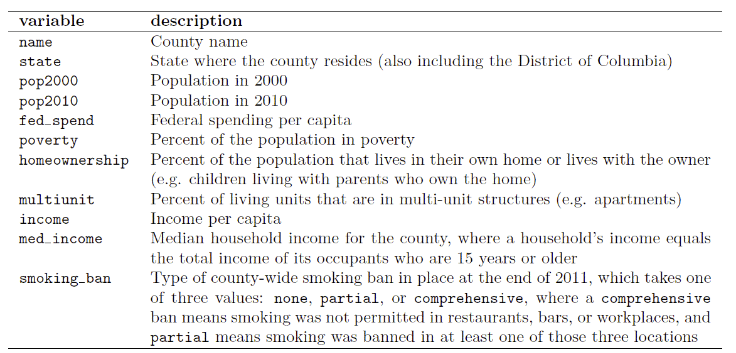

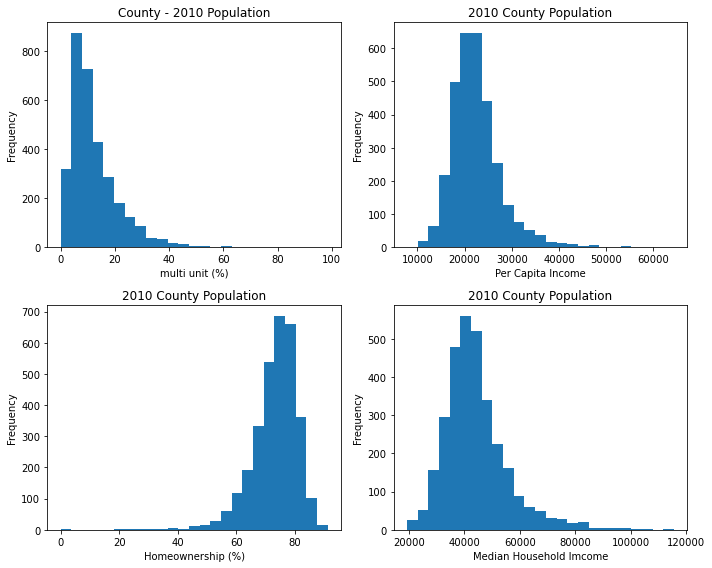

In [34]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2, 2, 1)

ax1.hist(county['multiunit'], bins=25)
plt.title('County - 2010 Population')
plt.ylabel('Frequency')
plt.xlabel('multi unit (%)')

ax2 = fig.add_subplot(2, 2, 2)

ax2.hist(county['income'], bins=25)

plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Per Capita Income')

ax3 = fig.add_subplot(2, 2, 3)

ax3.hist(county['homeownership'], bins=25)
plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Homeownership (%)')

ax4 = fig.add_subplot(2, 2, 4)

ax4.hist(county['med_income'], bins=25)

plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Median Household Imcome')

plt.tight_layout()

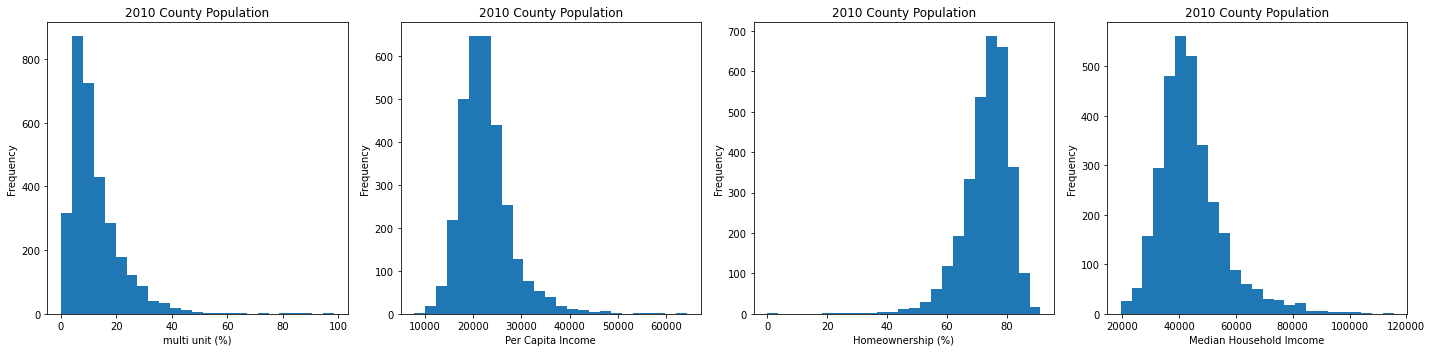

In [35]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1, 4, 1)

ax1.hist(county['multiunit'], bins=25)
plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('multi unit (%)')

ax2 = fig.add_subplot(1, 4, 2)

ax2.hist(county['income'], bins=25)

plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Per Capita Income')

ax3 = fig.add_subplot(1, 4, 3)

ax3.hist(county['homeownership'], bins=25)
plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Homeownership (%)')

ax4 = fig.add_subplot(1, 4, 4)

ax4.hist(county['med_income'], bins=25)

plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Median Household Imcome')

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout()

In [36]:
round(dbe.describe(), 3)

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess
count,50.000,50.000,50.0,50.000,50.000,50.0,50.000,50.000,50.0,50.0,50.000,50.000,50.00,50.000,50.000,50.00,50.0,50.000
mean,0.100,0.140,1.0,0.380,0.320,0.0,0.100,0.900,0.0,0.0,0.460,11.598,267.30,0.740,0.280,0.06,0.0,4.420
std,0.303,0.351,0.0,1.086,0.471,0.0,0.416,3.518,0.0,0.0,1.631,13.125,290.82,0.443,0.454,0.24,0.0,7.661
min,0.000,0.000,1.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.057,5.00,0.000,0.000,0.00,0.0,0.000
25%,0.000,0.000,1.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,2.536,60.25,0.250,0.000,0.00,0.0,1.000
50%,0.000,0.000,1.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,6.890,162.50,1.000,0.000,0.00,0.0,1.500
75%,0.000,0.000,1.0,0.000,1.000,0.0,0.000,0.000,0.0,0.0,0.000,15.411,459.00,1.000,1.000,0.00,0.0,4.000
max,1.000,1.000,1.0,5.000,1.000,0.0,2.000,23.000,0.0,0.0,8.000,64.401,1167.00,1.000,1.000,1.00,0.0,43.000


## Graficos de cajas - BOX LOTS

Un diagrama de cajas resume un conjunto de datos utilizando **cinco estadísticos**, a la vez que traza observaciones inusuales: **anomalías o valores atípicos**.

#### Quartiles y la Mediana

In [37]:
dbe.shape

(50, 21)

In [38]:
dbe.describe()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess
count,50.000000,50.00000,50.0,50.000000,50.000000,50.0,50.000000,50.000000,50.0,50.0,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.0,50.000000
mean,0.100000,0.14000,1.0,0.380000,0.320000,0.0,0.100000,0.900000,0.0,0.0,0.460000,11.598220,267.30000,0.740000,0.280000,0.060000,0.0,4.420000
std,0.303046,0.35051,0.0,1.085902,0.471212,0.0,0.416497,3.518174,0.0,0.0,1.631451,13.125261,290.81983,0.443087,0.453557,0.239898,0.0,7.661433
min,0.000000,0.00000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.057000,5.00000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.00000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.535500,60.25000,0.250000,0.000000,0.000000,0.0,1.000000
50%,0.000000,0.00000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,6.889500,162.50000,1.000000,0.000000,0.000000,0.0,1.500000
75%,0.000000,0.00000,1.0,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,15.410750,459.00000,1.000000,1.000000,0.000000,0.0,4.000000
max,1.000000,1.00000,1.0,5.000000,1.000000,0.0,2.000000,23.000000,0.0,0.0,8.000000,64.401000,1167.00000,1.000000,1.000000,1.000000,0.0,43.000000


In [39]:
(dbe['num_char']).describe()

count    50.000000
mean     11.598220
std      13.125261
min       0.057000
25%       2.535500
50%       6.889500
75%      15.410750
max      64.401000
Name: num_char, dtype: float64

La mediana (6.890) divide los datos en el 50% inferior y el 50% superior, marcados en el gráfico de puntos con guiones horizontales y círculos abiertos, respectivamente.

In [40]:
round((dbe['num_char']).median(), 3)

6.889

El primer paso en la construcción de un **diagrama de cajas** es trazar una línea oscura que denote la **mediana**, que **divide** los datos por la mitad. El **50%** de los datos caen por debajo de la **mediana** y el otro **50%** caen por encima de la **mediana**.

Hay 50 caracteres en el **conjunto de datos** (un número par), por lo que los datos se dividen perfectamente en dos grupos de 25. En este caso, tomamos la **mediana** como la **media** de las dos observaciones más cercanas al percentil 50:

Cuando hay un número impar de observaciones, habrá exactamente una observación que divida los datos en dos mitades, y en tal caso esa observación es la **mediana** (no se necesita la media).

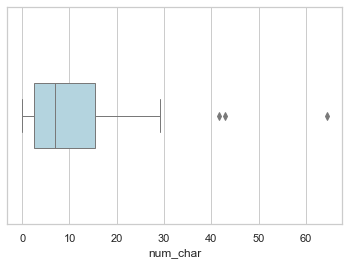

In [41]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dbe["num_char"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

### Mediana
Si los datos están **ordenados de menor a mayor**, la **mediana** es la **observación** que se encuentra justo en el **medio**.

Si hay un número par de observaciones, habrá dos valores en el medio, y la **mediana** se toma como su promedio.

El segundo paso en la construcción de un gráfico de caja es dibujar un rectángulo que represente el 50% central de los datos. 
La longitud total de la caja se denomina **rango intercuartílico (IQR)**. Al igual que la **Desviación típica**, es una medida de la **Variabilidad** de los datos. Cuanto **más variables sean los datos**, mayores serán la **desviación típica** y el **IQR**.

Los **dos límites** de la caja se denominan **primer cuartil** (el percentil 25), es decir el 25% de los datos caen por debajo de este valor y el tercer cuartil (el percentil 75), y se suelen etiquetar como Q1 y Q3 respectivamente.

### Rango intercuartílico (IQR)
El IQR es la longitud de la caja en un diagrama de caja. Se calcula como

donde Q1 y Q3 son el percentil 25 y 75.

<AxesSubplot:xlabel='num_char'>

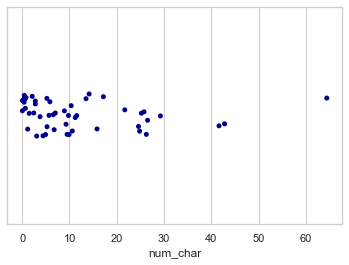

In [42]:
sns.stripplot(x=dbe["num_char"], orient='v', color='darkblue')

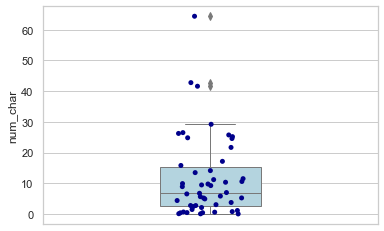

In [43]:
ax = sns.boxplot(y="num_char", data=dbe,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=dbe["num_char"], orient='v', color='darkblue')

In [44]:
dbe.num_char

0     21.705
1      7.011
2      0.631
3      2.454
4     41.623
5      0.057
6      0.809
7      5.229
8      9.277
9     17.170
10    64.401
11    10.368
12    42.793
13     0.451
14    29.233
15     9.794
16     2.139
17     0.130
18     4.945
19    11.533
20     5.682
21     6.768
22     0.086
23     3.070
24    26.520
25    26.255
26     5.259
27     2.780
28     5.864
29     9.928
30    25.209
31     6.563
32    24.599
33    25.757
34     0.409
35    11.223
36     3.778
37     1.493
38    10.613
39     0.493
40     4.415
41    14.156
42     9.491
43    24.837
44     0.684
45    13.502
46     2.789
47     1.169
48     8.937
49    15.829
Name: num_char, dtype: float64

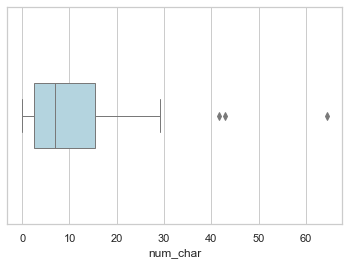

In [45]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dbe["num_char"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

<AxesSubplot:xlabel='num_char'>

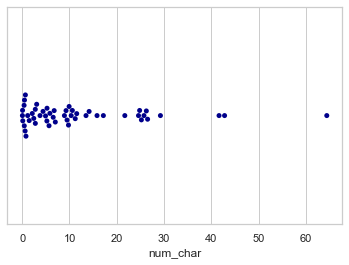

In [46]:
sns.swarmplot(x=dbe["num_char"], orient='v', color='darkblue')

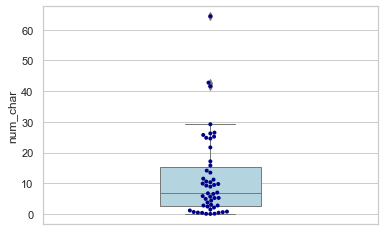

In [47]:
ax = sns.boxplot(y="num_char", data=dbe,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.swarmplot(y="num_char", data=dbe, color="darkblue", orient="v", size=4)

### EXERCISE - 3.8

1. Que porcentaje de los datos cae entre el Q1 y la mediana?
2. Que porcentaje está entre la mediana y el Q3?

### SOLUCIÓN - 3.8

1. Dado que Q1 y Q3 capturan el **50%** medio de los datos y la mediana divide los datos por la mitad,
2. el **25%** de los datos caen entre el Q1 y la mediana, y otro 25% cae entre la mediana y Q3.

Al extenderse fuera de la caja, los "bigotes" (wiskers) intentan capturar los datos fuera de la caja, sin embargo, su alcance nunca puede ser mayor que 1.5 x IQR

Captan todo lo que se encuentra dentro de este alcance. El **bigote superior** no se extiende hasta los tres últimos puntos, que están más allá de Q3 +1.5 x IQR, por lo que sólo se extiende hasta el último punto por debajo de este límite.

El **bigote inferior** se detiene en el valor más bajo, **33**, ya que no hay datos adicionales que alcanzar; el **límite del bigote inferior** no se muestra en la figura porque el gráfico no se extiende hasta Q1 - 1.5 x IQR. En cierto sentido, la caja es como el cuerpo del diagrama de caja y los bigotes son como sus brazos intentando alcanzar el resto de los datos.

Cualquier observación que se encuentre más allá de los bigotes se marca con un punto. El propósito de etiquetar estos puntos - en lugar de simplemente extender los bigotes a los valores mínimos y máximos observados - es ayudar a identificar cualquier observación que parezca estar inusualmente alejada del resto de los datos. Las observaciones inusualmente distantes se denominan **valores atípicos (Outliers)**.

En este caso, sería razonable clasificar los correos electrónicos con recuentos de caracteres de 41.623, 42.793 y 64.401 como valores atípicos, ya que son numéricamente distantes de la mayoría de los datos.

### Valor atípico (Outlier)
Un **valor atípico** es una observación que parece **extrema** en relación con el resto de los **datos**.


**Por qué es importante buscar valores atípicos**

El examen de los datos en busca de posibles **valores atípicos** tiene muchas finalidades útiles, entre ellas :

1. Identificar una fuerte **asimetría/sesgo** en la distribución.
2. Identificar errores de recogida o **introducción de datos**. Por ejemplo, volvimos a examinar el correo electrónico que supuestamente tenía 64.401 caracteres para asegurarnos de que este valor era exacto.
3. Proporcionar **información** sobre **propiedades** interesantes de los **datos**.

### EJERCICIO - 3.9

estime los siguientes valores para **num_char** en el conjunto de datos email50:

a) Q1, 

b) Q3, y

c) IQR

### SOLUCIÓN - 3.9

Estas estimaciones visuales variarán un poco de una persona a otra: Q1 = 3.000, Q3 = 15.000, IQR = Q3 - Q1 = 12.000.

(Los valores verdaderos: Q1 = 2.536, Q3 = 15.411, IQR = 12.875.)

## Ejercicio Practico -- Scatter Plots
**Scatter Plots o Gráficos de Puntos** pueden ser muy utiles para examinar las relationes existentes entre dos series de datos uni-dimensionales.

Usaremos el dataset **tips**, selecionaremos unas cuantas variables.

In [48]:
tips = pd.read_csv('C:/Users/alpid/Downloads/tips.csv', sep=',', encoding='utf-8') #El archivo no esyaba en el repositorio asi que lo he buscado en otro
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
tips.shape

(244, 7)

In [50]:
tips.ndim

2

In [51]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [52]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [53]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


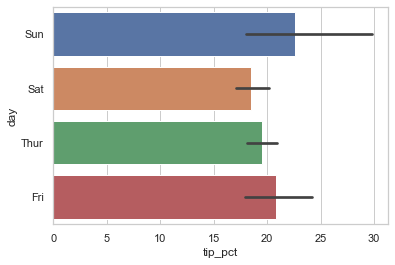

In [54]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

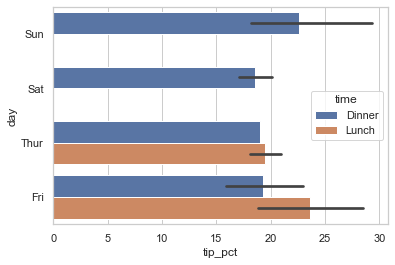

In [55]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

In [56]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [57]:
round(tips.describe(include='all'), 3)   # Incluye los datos numéricos y catagóricos

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [58]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [59]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [60]:
round((tips['tip']).median(), 3)  # Estaba mal en el enunciado

2.9

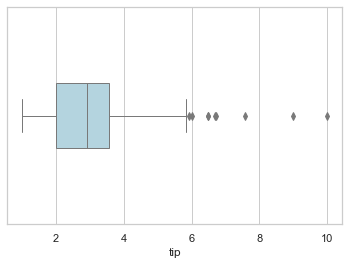

In [61]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

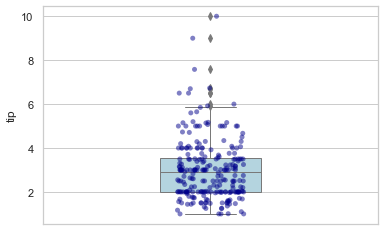

In [62]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

### Una Variable: 1 Numérica = 'tip_pct'

In [63]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip_pct       float64
dtype: object

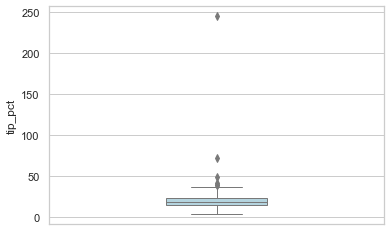

In [64]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

### Dos Variables: 1 Categórica = 'day', 1 Numérica = 'tip_pct'

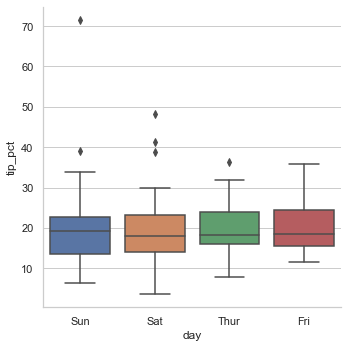

In [65]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

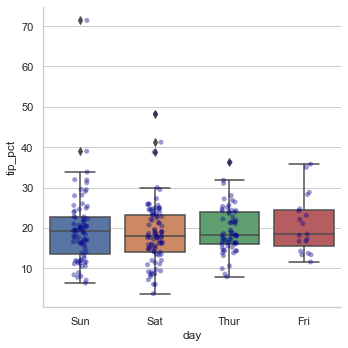

In [66]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

### Tres Variables : 2 Categóricas = ('day', 'time'), 1 Numérica = 'tip_pct'

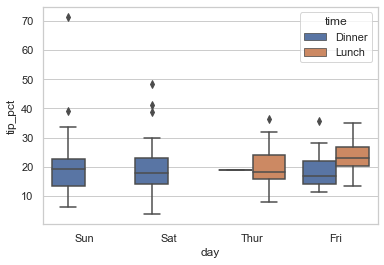

In [67]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

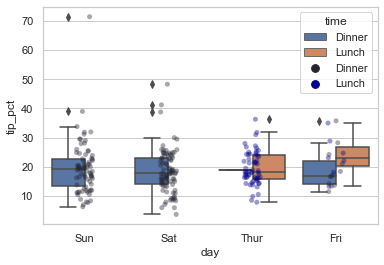

In [68]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

### Facet Grids y Categorical DataFrame
Nos permite profundizar todavía más en el analysis, añadiendo una variable categórica adicional.

Usando el método **factorplot( )** de "Facet Grid" :

### Cuatro Variables : 3 Categoricas = ('day', 'time', 'smoker'), 1 Numérica = 'tip_pct'

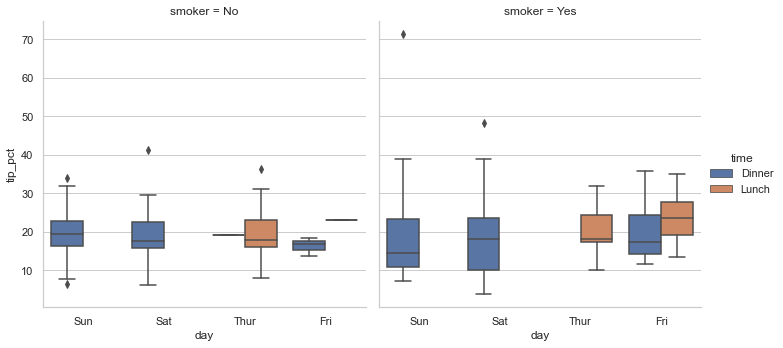

In [69]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

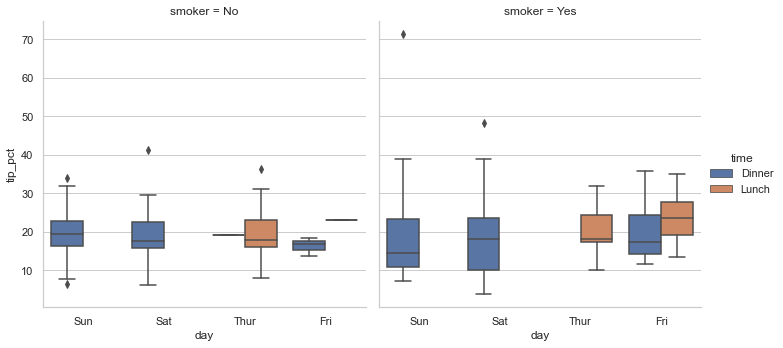

In [70]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

# Exercici 2
## Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

## ->[PRE-PROCESSING-DATA/movies.dat](https://github.com/BIDDL3/PRE-PROCESSING-DATA/blob/main/movies.dat)

## Important: El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [71]:
mcabecera = ['movie_id', 'titulo', 'genero']  # Creamos un cabecera porque los datos no tienen
mcabecera

['movie_id', 'titulo', 'genero']

In [72]:
movies = pd.read_table('C:/Users/alpid/Downloads/movies.dat', sep='::', header= None, names=mcabecera, encoding='iso-8859-1')
movies.head()

,movie_id,titulo,genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Vemos que hay que separar las informaciones de las columnas para que puedan ser trtadas pero primero hago un sanity check adicional:

In [73]:
type(movies)   # buscamos el tipo de estructura del dataset

pandas.core.frame.DataFrame

In [74]:
movies.shape   # miramos la dimensión del dataset

(3883, 3)

In [75]:
movies.dtypes   # Miramos el tipo de dato

movie_id     int64
titulo      object
genero      object
dtype: object

In [76]:
movies.info()    # Visualizamos el dataset de una forma mas resumida

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   titulo    3883 non-null   object
 2   genero    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [77]:
movies.describe()

,movie_id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [78]:
movies.describe(include="all")

,movie_id,titulo,genero
count,3883.000000,3883,3883
unique,NaN,3883,301
top,NaN,Toy Story (1995),Drama
freq,NaN,1,843
mean,1986.049446,NaN,NaN
std,1146.778349,NaN,NaN
min,1.000000,NaN,NaN
25%,982.500000,NaN,NaN
50%,2010.000000,NaN,NaN
75%,2980.500000,NaN,NaN


In [79]:
filas_nulas = movies.isnull().sum(axis=0)  #comprobamos si hay fials nulas
filas_nulas

movie_id    0
titulo      0
genero      0
dtype: int64

In [80]:
cols_zero_o_nan = movies.columns[movies.isna().all() | (movies == 0).all()]  # Comprobamos si hay columnas nulas
cols_zero_o_nan

Index([], dtype='object')

In [81]:
movies.duplicated()  # Comprobamos si hay filas duplicadas

0       False
1       False
2       False
3       False
4       False
        ...  
3878    False
3879    False
3880    False
3881    False
3882    False
Length: 3883, dtype: bool

### Despues del sanity check voy a proceder a limpiar la columna genero y titulo que tinen varias informaciones

### Empecemos por los generos:

Agregar dummy variables para cada género requiere un poco de transformación.

Primero, extraemos la lista de géneros únicos en el dataset:

In [82]:
todos_generos = movies["genero"]
todos_generos

0        Animation|Children's|Comedy
1       Adventure|Children's|Fantasy
2                     Comedy|Romance
3                       Comedy|Drama
4                             Comedy
                    ...             
3878                          Comedy
3879                           Drama
3880                           Drama
3881                           Drama
3882                  Drama|Thriller
Name: genero, Length: 3883, dtype: object

In [83]:
type(todos_generos)

pandas.core.series.Series

In [84]:
generos = pd.unique(todos_generos)
generos

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [85]:
len(generos)

301

Es decir, tenemos una columna con 3883 filas en las que hay defnidos (evidentemente algunos repetidos) 301 generos.

#### Tenemos dos opciones para sacar los 301 generos y ponerlos en columnas:
#### -  Opcion A (Corta y eficiente):  Cosntruir directamente un Dataframe con columnas por genero y filas por pleicula con 1 o 0 donde sea su género
#### - Opción B (Larga y poco eficiente en este caso): Creando una matriz/array de ceros a partir de "movies", trasnformándola en un Dataframe equivalente de ceros, para despues asignarle los generos a los titulos de las columnas e ir asignando 0 o 1 pasando por cada celda de "movies" (la encuentro compleja, y un gasto innecesario de memoria pero la haré también para aprender)

### Opcion A: 
df_dummies = pd.get_dummies(movies["genero"]), 

que me crea un Dataframe de tantas filas como "movies" y tantas columnas como generos únicos haya en la columna "generos", con 0 donde no coincida el genero con su fila y 1 donde coincida.

In [86]:
df_dummies = pd.get_dummies(movies["genero"])
df_dummies

,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Luego concatenaré esta con la original para tener las peliculas por género, pero previamente hago también la opcion B como he comentado:

In [87]:
df_dummies.shape

(3883, 301)

Podemos agregar un prefijo a las columnas en el dummy DataFrame, que luego se puede combinar con los otros datos:

In [88]:
df_dummies = pd.get_dummies(movies["genero"], prefix = "Género")  # SI hago este no ahce falta el anterior pero lo dejo para ver como hacerlo en ambos casos
df_dummies

,Género_Action,Género_Action|Adventure,Género_Action|Adventure|Animation,Género_Action|Adventure|Animation|Children's|Fantasy,Género_Action|Adventure|Animation|Horror|Sci-Fi,Género_Action|Adventure|Children's,Género_Action|Adventure|Children's|Comedy,Género_Action|Adventure|Children's|Fantasy,Género_Action|Adventure|Children's|Sci-Fi,Género_Action|Adventure|Comedy,...,Género_Romance|Thriller,Género_Romance|War,Género_Romance|Western,Género_Sci-Fi,Género_Sci-Fi|Thriller,Género_Sci-Fi|Thriller|War,Género_Sci-Fi|War,Género_Thriller,Género_War,Género_Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df_dummies.sum()    # Como se puede ver, los 1 estan puesto donde coincide la pelicula y el genero

Género_Action                                            65
Género_Action|Adventure                                  25
Género_Action|Adventure|Animation                         1
Género_Action|Adventure|Animation|Children's|Fantasy      1
Género_Action|Adventure|Animation|Horror|Sci-Fi           1
                                                       ... 
Género_Sci-Fi|Thriller|War                                1
Género_Sci-Fi|War                                         1
Género_Thriller                                         101
Género_War                                               12
Género_Western                                           33
Length: 301, dtype: int64

#### B) creando una matriz equivalente de ceros, para despues asignarle los generos a los titulos de las columnas e ir asignando 0 o 1 pasando por cada celda de "movies" (la encuentro compleja, y un gasto innecesario de memoria pero la haré también para aprender)

Recordemos, en este caso habíamos creado un array con los generos unicos:

In [90]:
generos = pd.unique(movies["genero"])
generos

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [91]:
len(generos)  # Hay 301 generos unicos, que será la cantidad de columnas a crear

301

In [92]:
len(movies)   # la tabla orignial tiene 3883 filas de peliculas que será el número de filas a crear

3883

In [93]:
cero_matriz = np.zeros((len(movies), len(generos)))  # creamos el array de 3883 filas y 301 columnas
cero_matriz.shape

(3883, 301)

In [94]:
cero_matriz

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
dummies = pd.DataFrame(cero_matriz, columns = generos)   # La transforma en un Dataframe asignandole los generos a los titulos de las columnas
dummies.head() 

,Animation|Children's|Comedy,Adventure|Children's|Fantasy,Comedy|Romance,Comedy|Drama,Comedy,Action|Crime|Thriller,Adventure|Children's,Action,Action|Adventure|Thriller,Comedy|Drama|Romance,...,Adventure|Drama|Thriller,Adventure|Fantasy,Musical|War,Adventure|Musical|Romance,Action|Romance|Sci-Fi,Drama|Film-Noir,Comedy|Horror|Sci-Fi,Adventure|Drama|Romance|Sci-Fi,Adventure|Animation|Sci-Fi,Adventure|Crime|Sci-Fi|Thriller
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Atencion**: A direfencia del primer método (Opcion A), este Dataframe solo contiene ceros, todavia no esta comparado con movies.

In [96]:
dummies.sum()      #Evidentemente las columnas suman cero

Animation|Children's|Comedy        0.0
Adventure|Children's|Fantasy       0.0
Comedy|Romance                     0.0
Comedy|Drama                       0.0
Comedy                             0.0
                                  ... 
Drama|Film-Noir                    0.0
Comedy|Horror|Sci-Fi               0.0
Adventure|Drama|Romance|Sci-Fi     0.0
Adventure|Animation|Sci-Fi         0.0
Adventure|Crime|Sci-Fi|Thriller    0.0
Length: 301, dtype: float64

Ahora, iteramos cada película y configuramos las entradas en cada fila de dummies a 1. Para hacer esto, usamos dummies.columns para calcular los índices de columna para cada género:

In [97]:
dummies.columns

Index(['Animation|Children's|Comedy', 'Adventure|Children's|Fantasy',
       'Comedy|Romance', 'Comedy|Drama', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children's', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Drama|Romance',
       ...
       'Adventure|Drama|Thriller', 'Adventure|Fantasy', 'Musical|War',
       'Adventure|Musical|Romance', 'Action|Romance|Sci-Fi', 'Drama|Film-Noir',
       'Comedy|Horror|Sci-Fi', 'Adventure|Drama|Romance|Sci-Fi',
       'Adventure|Animation|Sci-Fi', 'Adventure|Crime|Sci-Fi|Thriller'],
      dtype='object', length=301)

In [98]:
gen = movies.genero[0]
gen

"Animation|Children's|Comedy"

In [99]:
gen.split('|')

['Animation', "Children's", 'Comedy']

In [100]:
dummies.columns.get_indexer(gen.split('|'))

array([122,  78,   4], dtype=int64)

Ahora, podemos utilizar .iloc para establecer valores basados en estos índices :

In [101]:
for i, gen in enumerate(movies.genero):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [102]:
movies.head()

,movie_id,titulo,genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [103]:
dummies.head()

,Animation|Children's|Comedy,Adventure|Children's|Fantasy,Comedy|Romance,Comedy|Drama,Comedy,Action|Crime|Thriller,Adventure|Children's,Action,Action|Adventure|Thriller,Comedy|Drama|Romance,...,Adventure|Drama|Thriller,Adventure|Fantasy,Musical|War,Adventure|Musical|Romance,Action|Romance|Sci-Fi,Drama|Film-Noir,Comedy|Horror|Sci-Fi,Adventure|Drama|Romance|Sci-Fi,Adventure|Animation|Sci-Fi,Adventure|Crime|Sci-Fi|Thriller
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
dummies.sum()

Animation|Children's|Comedy           0.0
Adventure|Children's|Fantasy          0.0
Comedy|Romance                        0.0
Comedy|Drama                          0.0
Comedy                             1200.0
                                    ...  
Drama|Film-Noir                       0.0
Comedy|Horror|Sci-Fi                  0.0
Adventure|Drama|Romance|Sci-Fi        0.0
Adventure|Animation|Sci-Fi            0.0
Adventure|Crime|Sci-Fi|Thriller       0.0
Length: 301, dtype: float64

### Finalmente podemos combinar "dummies" o "df_dummies" (son lo mismo creado de dos formas distintas), con "movies":

In [105]:
movies_dummies = movies.join(df_dummies)
movies_dummies.head()

,movie_id,titulo,genero,Género_Action,Género_Action|Adventure,Género_Action|Adventure|Animation,Género_Action|Adventure|Animation|Children's|Fantasy,Género_Action|Adventure|Animation|Horror|Sci-Fi,Género_Action|Adventure|Children's,Género_Action|Adventure|Children's|Comedy,...,Género_Romance|Thriller,Género_Romance|War,Género_Romance|Western,Género_Sci-Fi,Género_Sci-Fi|Thriller,Género_Sci-Fi|Thriller|War,Género_Sci-Fi|War,Género_Thriller,Género_War,Género_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Comprobemos por ejemplo que cuando el **"genero"** de una pelicula es **Action**, tenemos un 1 en la columna de **"Género_Action"**:

In [106]:
movies_dummies.loc[movies_dummies["genero"]=="Action"]

,movie_id,titulo,genero,Género_Action,Género_Action|Adventure,Género_Action|Adventure|Animation,Género_Action|Adventure|Animation|Children's|Fantasy,Género_Action|Adventure|Animation|Horror|Sci-Fi,Género_Action|Adventure|Children's,Género_Action|Adventure|Children's|Comedy,...,Género_Romance|Thriller,Género_Romance|War,Género_Romance|Western,Género_Sci-Fi,Género_Sci-Fi|Thriller,Género_Sci-Fi|Thriller|War,Género_Sci-Fi|War,Género_Thriller,Género_War,Género_Western
8,9,Sudden Death (1995),Action,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,20,Money Train (1995),Action,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,71,Fair Game (1995),Action,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,145,Bad Boys (1995),Action,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202,204,Under Siege 2: Dark Territory (1995),Action,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,3633,On Her Majesty's Secret Service (1969),Action,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3566,3635,"Spy Who Loved Me, The (1977)",Action,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3570,3639,"Man with the Golden Gun, The (1974)",Action,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3700,3769,Thunderbolt and Lightfoot (1974),Action,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Quizá aquí he acabado el ejercicio, pero voy a sacar el año y el titulo tambien en columnas separadas:

In [107]:
movies_dummies["titulo"]

0                         Toy Story (1995)
1                           Jumanji (1995)
2                  Grumpier Old Men (1995)
3                 Waiting to Exhale (1995)
4       Father of the Bride Part II (1995)
                       ...                
3878               Meet the Parents (2000)
3879            Requiem for a Dream (2000)
3880                      Tigerland (2000)
3881               Two Family House (2000)
3882                 Contender, The (2000)
Name: titulo, Length: 3883, dtype: object

In [108]:
movies_dummies.shape

(3883, 304)

In [109]:
# uso rsplit en vez de split para que me coja la última ocurrencia de la aparición del parentesis "(", porque hay peliculas que tienen parte del título entre parentesis
movies_dummies[["Titulo", "Año"]] = movies_dummies["titulo"].str.rsplit("(", n=1, expand=True) # rsplit recoge todo el titulo hasta el último parentesis, expand= true devuelve un dataframe de columnas (una para lo anterior y otra apra lo posterior a "(" 
movies_dummies["Año"] = movies_dummies["Año"].str.replace(")", "")  # Remplaza de la recién creada columna Años el parentesis por nada 
movies_dummies.head()

,movie_id,titulo,genero,Género_Action,Género_Action|Adventure,Género_Action|Adventure|Animation,Género_Action|Adventure|Animation|Children's|Fantasy,Género_Action|Adventure|Animation|Horror|Sci-Fi,Género_Action|Adventure|Children's,Género_Action|Adventure|Children's|Comedy,...,Género_Romance|Western,Género_Sci-Fi,Género_Sci-Fi|Thriller,Género_Sci-Fi|Thriller|War,Género_Sci-Fi|War,Género_Thriller,Género_War,Género_Western,Titulo,Año
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Father of the Bride Part II,1995


In [110]:
pelis=movies_dummies   # solo para simplificarme el trabajo
pelis

,movie_id,titulo,genero,Género_Action,Género_Action|Adventure,Género_Action|Adventure|Animation,Género_Action|Adventure|Animation|Children's|Fantasy,Género_Action|Adventure|Animation|Horror|Sci-Fi,Género_Action|Adventure|Children's,Género_Action|Adventure|Children's|Comedy,...,Género_Romance|Western,Género_Sci-Fi,Género_Sci-Fi|Thriller,Género_Sci-Fi|Thriller|War,Género_Sci-Fi|War,Género_Thriller,Género_War,Género_Western,Titulo,Año
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Father of the Bride Part II,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Meet the Parents,2000
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Requiem for a Dream,2000
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Tigerland,2000
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Two Family House,2000


In [111]:
pelis.dtypes

movie_id                    int64
titulo                     object
genero                     object
Género_Action               uint8
Género_Action|Adventure     uint8
                            ...  
Género_Thriller             uint8
Género_War                  uint8
Género_Western              uint8
Titulo                     object
Año                        object
Length: 306, dtype: object

**Atención**: Como podemos ver, los Años los trata como object, asi que los pasaré a números:

In [112]:
pelis["Año"]=pelis["Año"].astype("int64")

In [113]:
Años_comp = pd.unique(pelis["Año"])
Años_comp

array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1964, 1977, 1965,
       1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1963,
       1950, 1946, 1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952,
       1951, 1957, 1961, 1954, 1934, 1944, 1942, 1941, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966, 1978,
       1985, 1983, 1984, 1931, 1922, 1927, 1929, 1928, 1925, 1923, 1999,
       1919, 2000, 1920, 1921], dtype=int64)

Y ordeno el DataFrame por año:

In [114]:
pelis.sort_values(by="Año", ascending=True, inplace=True)
pelis

,movie_id,titulo,genero,Género_Action,Género_Action|Adventure,Género_Action|Adventure|Animation,Género_Action|Adventure|Animation|Children's|Fantasy,Género_Action|Adventure|Animation|Horror|Sci-Fi,Género_Action|Adventure|Children's,Género_Action|Adventure|Children's|Comedy,...,Género_Romance|Western,Género_Sci-Fi,Género_Sci-Fi|Thriller,Género_Sci-Fi|Thriller|War,Género_Sci-Fi|War,Género_Thriller,Género_War,Género_Western,Titulo,Año
3063,3132,Daddy Long Legs (1919),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Daddy Long Legs,1919
2754,2823,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...",Action|Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...",1919
2752,2821,Male and Female (1919),Adventure|Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Male and Female,1919
3240,3309,"Dog's Life, A (1920)",Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"Dog's Life, A",1920
3162,3231,"Saphead, The (1920)",Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"Saphead, The",1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,3827,Space Cowboys (2000),Action|Sci-Fi,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Space Cowboys,2000
3466,3535,American Psycho (2000),Comedy|Horror|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,American Psycho,2000
3759,3829,Mad About Mambo (2000),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Mad About Mambo,2000
3761,3831,Saving Grace (2000),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Saving Grace,2000


In [115]:
Años_comp = pd.unique(pelis["Año"])
Años_comp

array([1919, 1920, 1921, 1922, 1923, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000], dtype=int64)

# Exercici 3
## Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

## Fes una o dues representacions gràfiques i justifica la teva elecció.

Como se puede ver, he creado también las columnas año y Título para facilitarme el tratamiento.

1) Vemaos la evolución de las peliculas por año apilando generos.

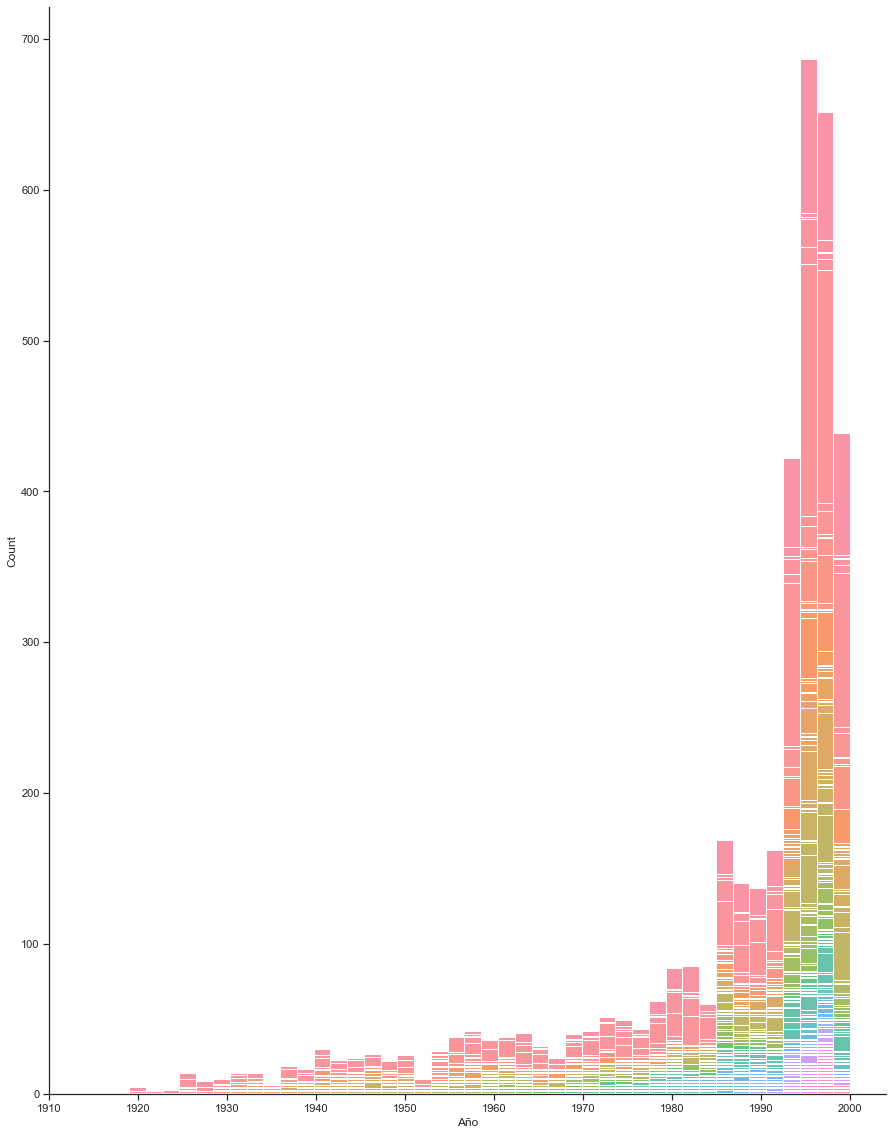

In [116]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(15, 20))
sns.despine(f)   #elimina los ejes de arriba y derecha del plot

sns.histplot( pelis, x="Año", hue="genero", multiple="stack", ax=ax, legend=False)  #quito la etiqueta de los generos porque es enorme
ax.set_xticks([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000])

plt.show()

Observamos un crecimineto exponencial de las peliculas con el crecimiento de unos generos concretos que veremos en mas detalle mas adelante.

Por el color de los graficos observamos que un grupo reducido de generos acumulan los crecimientos mas altos.

Podemos ya concluir que desde mediados de los 80 o principios de los 90 se produce un crecimiento exponencial de el número de peliculas por año.

2) Veamos ahora qué tipo de películas son las que han producido dicho crcimiento exponencial:

Creemos una columna en pelis con el valro de crecimineto por genero y calculemos el valor máximo:

In [117]:
pelis["Crecimiento"] = pelis.groupby("genero")["Año"].transform(lambda x: x.max() - x.min())
pelis["Crecimiento"].max()

81

Y hay 301 generos

In [118]:
len(generos)

301

EL 20% de los 301 generos son:

In [119]:
Pareto20 = len(generos)*20/100
round(Pareto20)

60

In [120]:
# Seleccionamos los top 60
top_generos = pelis.groupby("genero")["Crecimiento"].max().nlargest(60).index
top_generos

Index(['Action|Drama', 'Adventure|Drama', 'Comedy', 'Action', 'Drama',
       'Horror', 'Drama|War', 'Crime|Drama', 'Sci-Fi', 'Thriller',
       'Comedy|Romance', 'Drama|Romance|War', 'Adventure', 'Documentary',
       'Comedy|Drama|Romance', 'Mystery|Thriller', 'Comedy|Musical',
       'Crime|Drama|Mystery', 'Horror|Romance', 'Action|Adventure',
       'Horror|Sci-Fi', 'Musical', 'Romance', 'War', 'Action|Adventure|Horror',
       'Crime|Film-Noir|Thriller', 'Mystery', 'Romance|War', 'Comedy|War',
       'Western', 'Crime|Thriller', 'Drama|Musical',
       'Animation|Children's|Musical', 'Comedy|Musical|Romance',
       'Drama|Romance', 'Adventure|Animation|Children's',
       'Animation|Children's', 'Romance|Thriller', 'Children's|Drama',
       'Action|Drama|War', 'Animation|Children's|Comedy', 'Drama|Thriller',
       'Comedy|Mystery', 'Crime', 'Animation|Children's|Comedy|Musical',
       'Comedy|Drama', 'Comedy|Drama|War', 'Comedy|Horror',
       'Drama|Thriller|War', 'Adventure|

Creamos un sub-dataframe de los top generos.

In [121]:
pelis_top_generos = pelis[pelis["genero"].isin(top_generos)]
pelis_top_generos

,movie_id,titulo,genero,Género_Action,Género_Action|Adventure,Género_Action|Adventure|Animation,Género_Action|Adventure|Animation|Children's|Fantasy,Género_Action|Adventure|Animation|Horror|Sci-Fi,Género_Action|Adventure|Children's,Género_Action|Adventure|Children's|Comedy,...,Género_Sci-Fi,Género_Sci-Fi|Thriller,Género_Sci-Fi|Thriller|War,Género_Sci-Fi|War,Género_Thriller,Género_War,Género_Western,Titulo,Año,Crecimiento
3063,3132,Daddy Long Legs (1919),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Daddy Long Legs,1919,81
2754,2823,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...",Action|Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...",1919,81
2752,2821,Male and Female (1919),Adventure|Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Male and Female,1919,81
3240,3309,"Dog's Life, A (1920)",Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"Dog's Life, A",1920,81
3162,3231,"Saphead, The (1920)",Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"Saphead, The",1920,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,3825,Coyote Ugly (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Coyote Ugly,2000,78
3757,3827,Space Cowboys (2000),Action|Sci-Fi,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Space Cowboys,2000,46
3759,3829,Mad About Mambo (2000),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Mad About Mambo,2000,73
3761,3831,Saving Grace (2000),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Saving Grace,2000,81


In [122]:
pelis_por_genero_y_año = pelis_top_generos.pivot_table(index='Año', columns='genero', values='Titulo', aggfunc='count')
pelis_por_genero_y_año

genero,Action,Action|Adventure,Action|Adventure|Horror,Action|Drama,Action|Drama|War,Action|Sci-Fi,Action|Sci-Fi|War,Adventure,Adventure|Animation|Children's,Adventure|Children's|Drama,...,Mystery|Romance|Thriller,Mystery|Thriller,Romance,Romance|Thriller,Romance|War,Sci-Fi,Sci-Fi|Thriller,Thriller,War,Western
Año,,,,,,,,,,,,,,,,,,,,,
1919,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,7.0,3.0,NaN,1.0,NaN,2.0,1.0,1.0,NaN,NaN,...,NaN,1.0,11.0,NaN,1.0,NaN,2.0,4.0,1.0,NaN
1997,3.0,2.0,NaN,3.0,1.0,1.0,NaN,1.0,NaN,2.0,...,NaN,3.0,9.0,1.0,1.0,2.0,3.0,10.0,NaN,NaN
1998,1.0,2.0,1.0,5.0,2.0,2.0,NaN,NaN,NaN,1.0,...,NaN,1.0,5.0,1.0,NaN,NaN,1.0,5.0,NaN,NaN


Ordeno los generos por su valor de crecimiento total a lo largo de los años:

In [123]:
generos_ord = pelis_top_generos.groupby('genero')['Crecimiento'].sum().sort_values(ascending=False).index.tolist() 
generos_ord      #Obtenemos una lista de los géneros ordenados por su crecimiento total: donde se agrupan los datos del DataFrame por la columna 'genero' y se suman los valores de la columna 'Crecimiento', para después ordenarlos de manera descendente y guardarlos en una lista.

['Drama',
 'Comedy',
 'Horror',
 'Comedy|Romance',
 'Comedy|Drama',
 'Drama|Romance',
 'Documentary',
 'Thriller',
 'Action',
 'Drama|Thriller',
 'Crime|Drama',
 'Drama|War',
 'Action|Drama',
 'Romance',
 'Comedy|Drama|Romance',
 'Horror|Sci-Fi',
 'Western',
 "Animation|Children's",
 'Sci-Fi',
 'Action|Adventure',
 'Comedy|Horror',
 'Crime',
 'Mystery|Thriller',
 'Crime|Thriller',
 'Action|Sci-Fi',
 'Adventure',
 'Musical',
 "Animation|Children's|Musical",
 'Comedy|Musical',
 'Adventure|Drama',
 'War',
 'Drama|Musical',
 'Action|Drama|War',
 'Sci-Fi|Thriller',
 'Drama|Romance|War',
 "Children's|Drama",
 'Mystery',
 'Comedy|War',
 "Animation|Children's|Comedy",
 'Drama|Sci-Fi',
 'Comedy|Musical|Romance',
 'Film-Noir|Thriller',
 'Romance|Thriller',
 "Adventure|Children's|Drama",
 'Drama|Western',
 'Comedy|Mystery',
 'Crime|Film-Noir|Thriller',
 'Action|Adventure|Horror',
 'Romance|War',
 'Adventure|Romance',
 'Comedy|Drama|War',
 'Crime|Drama|Mystery',
 'Horror|Romance',
 "Animation|Chil

Hacemos el grafico de peliculas por genero y año:

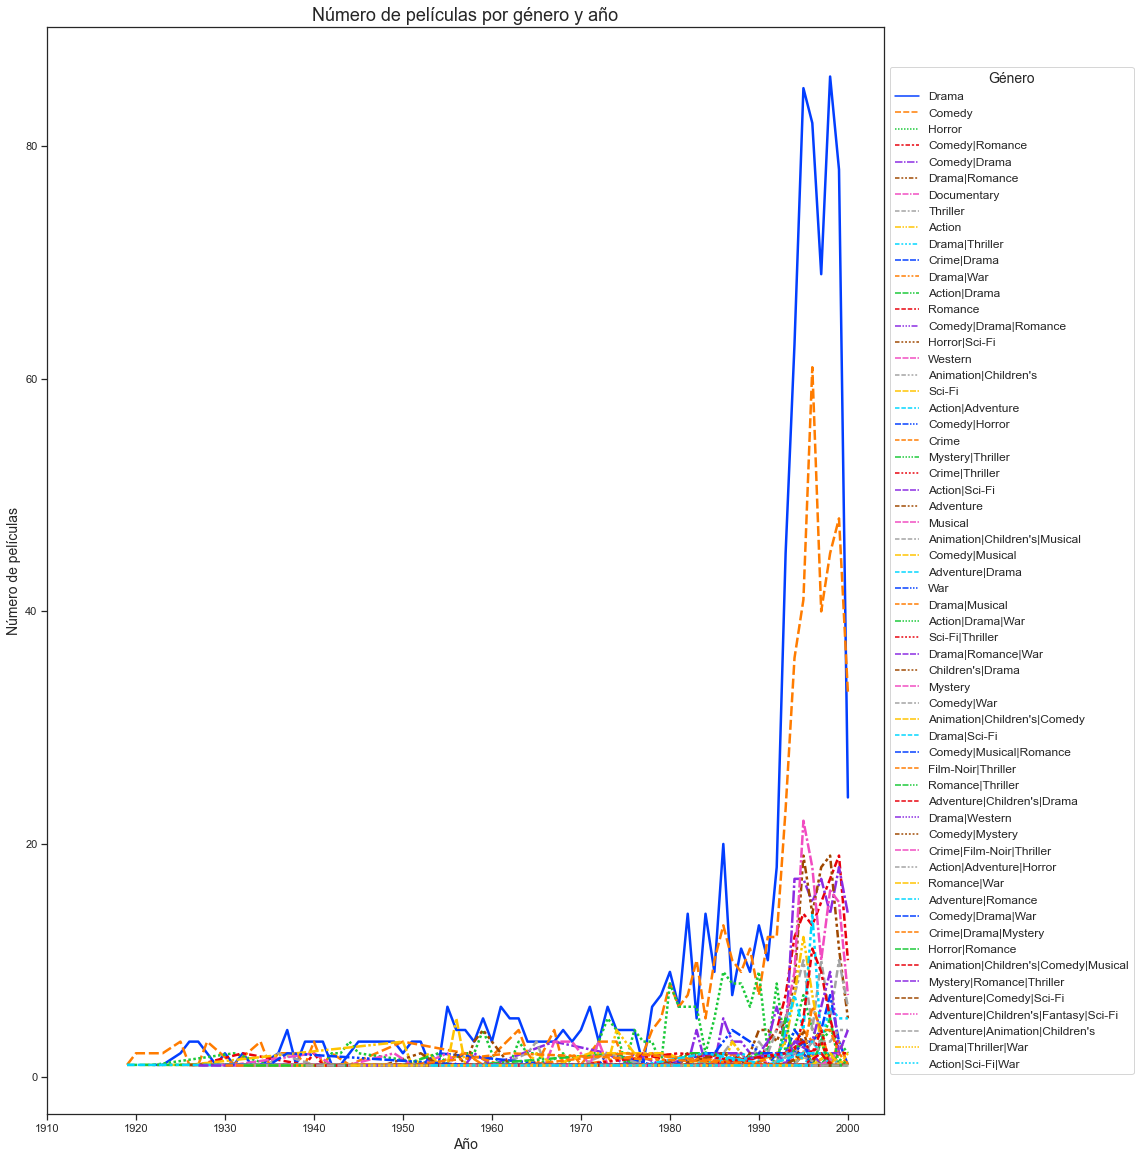

In [124]:
fig, ax = plt.subplots(figsize=(15, 20))

sns.lineplot(data=pelis_por_genero_y_año[generos_ord], palette='bright', linewidth=2.5, ax=ax) # Cogemos los datos de pelis por genero pero añadimos la variable[generos_ord] para ordenar los generos por su crecimiento total, sino, en la legend saldrían de acuerdo al orden en el dataframe
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Número de películas', fontsize=14)
ax.set_title('Número de películas por género y año', fontsize=18)
ax.legend(title='Género', loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12, title_fontsize=14)

ax.set_xticks([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000], fontsize=12)

plt.show()

Como podemos comprobar, no solo ha habido un crecimiento exponencial de las peliculas desde ñps años 90 sino que fundamentalmente se debe a la proliferación de Dramas y Comedias puras.
Si miramos los acontecimientos que ocurrieron entre 1985 y 1995, y asociamos la necesidad de ver comedias a una conciencia negativa de la sociedad y la necesidad de ver Dramas a una conciencia positiva de la sociedad (dicho de otro modo, cuando las cosas van mal noq ueremos dramas, y cuando van bien nos interesan mas), entonces podemos explciar que:
* Claramente la proliferación de peliculas indica tambien un periodo de boananza pues la oferta siempre se equilibra a la demanda
* Desde el año 1980 hay un interes algo superior al Drama que a la comedia pero van entrecurzandose, lo que hace pensar que el periodo de bonanza arranca progrsivamente mezclado con temas quepreocupan a la sociedad como la aparición del VIH o la guerra fria.
* En 1989 cae el Muro de Berlin suponiendo en ese momento el "fin" de la guerra fria, de modo que se produce un periodo de optimismo y un crecimiento económico muy fuerte, (incluyendo la firma del tratado de Maastricht en 1992, origen de la Union Europea y la apariciónd e internet desde 1991 que propició un crecimiento exponencial de el acceso a información), y efectivamnete a partir de 1990 o 1991 ambas curvas suben exponencialemnte siendo la curva de peliculas de Drama (azul) my por encima de la de películas de Comedia.
* Se puede ver perfectamente como en el año 2000 estalló la burbuja de la .com y calló la demanda y por tanto la oferta de peliculas a todos los niveles.
* Recordemos también que, entre otras, las siguientes películas de drama fueron record de recaudación: Forrest Gump(1994),
* REcordemos tambien a nivel de comedia Toy Story(1995), Austin Powers(1998) o Algo pasa con Mary (1998)
